In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

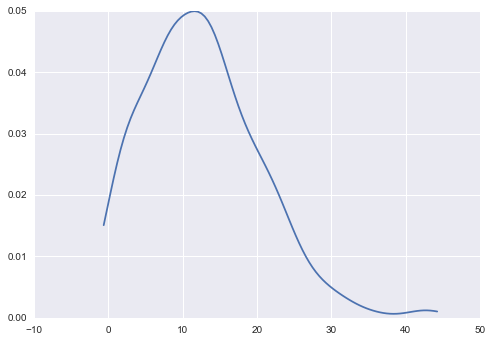

In [2]:
import seaborn as sns
import numpy as np

data = np.random.normal(10, 10, 300)
data = data[data > 0]
sns.kdeplot(data)

In [6]:
import pandas as pd

WEEK_LAG = 10

df = pd.DataFrame(data, columns=['value'])
df['rolling_mean'] = pd.rolling_mean(df.value, WEEK_LAG)
df['rolling_std'] = pd.rolling_std(df.value, WEEK_LAG)

df['misprediction_margin'] = df.value - df.rolling_mean
df['stds_outside_volatile_range'] = df.misprediction_margin / df.rolling_std

df.tail()

,value,rolling_mean,rolling_std,misprediction_margin,stds_outside_volatile_range
248,11.893637,12.004479,4.897450,-0.110842,-0.022633
249,8.141036,11.859608,4.997228,-3.718571,-0.744127
250,15.254165,11.449457,4.452220,3.804708,0.854564
251,3.164862,11.319971,4.690544,-8.155109,-1.738628
252,2.416130,10.096786,5.283641,-7.680656,-1.453667


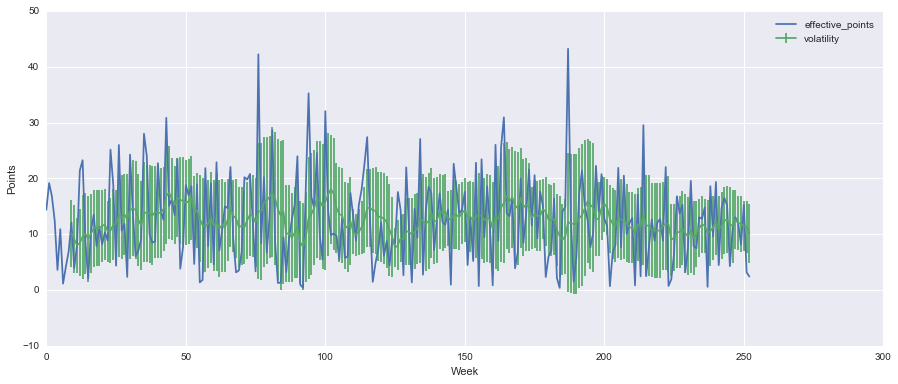

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(df.index, df.value, label='effective_points')
plt.errorbar(df.index, df.rolling_mean, yerr=df.rolling_std, label='volatility')
plt.legend()
plt.xlabel('Week')
plt.ylabel('Points')

In [7]:
df.stds_outside_volatile_range.describe()

count    244.000000
mean       0.002656
std        0.952488
min       -2.209975
25%       -0.695790
50%       -0.115799
75%        0.680658
max        2.490088
Name: stds_outside_volatile_range, dtype: float64

In [9]:
(df.stds_outside_volatile_range > 1).sum() / float(len(df))

0.18181818181818182